<a href="https://colab.research.google.com/github/meetgoel/ML-Projects/blob/main/SupervisedLearning/Banglore_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Banglore House Price Prediction


Link for the dataset: https://raw.githubusercontent.com/meetgoel/ML-Projects/refs/heads/main/Datasets/Bengaluru_House_Data.csv

Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Importing the dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/meetgoel/ML-Projects/refs/heads/main/Datasets/Bengaluru_House_Data.csv")

Exploratory Data Analysis (EDA)

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [5]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df = df.drop(['area_type','availability','society','balcony'],axis=1)

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [12]:
df.head(30)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [13]:
# sorted(list(df['total_sqft'].unique()))

Creating a function to check whether the value can be converted to float or not and if yes then return True else False

In [14]:
def is_float(x):
  try:
      float(x)
  except:
      return False
  return True

Checking the values that cannot be converted to float by using ~ operator

In [15]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
# list(df['location'].unique())

creating a function to convert the range values to float and for the average value

In [17]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [18]:
convert_sqft_to_num('1255')

1255.0

In [19]:
convert_sqft_to_num('1225-1330')

1277.5

In [20]:
convert_sqft_to_num('34.46Sq. Meter')

In [21]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [22]:
df = df[df.total_sqft.notnull()]

In [23]:
df.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


In [24]:
df.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


Calculating the price per sqft for each house

In [25]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
len(df.location.unique())

1298

In [27]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,533
Sarjapur Road,392
Electronic City,304
Kanakpura Road,264
Thanisandra,235
...,...
"beml layout, basaveshwara nagar",1
basaveshwarnagar,1
1 Giri Nagar,1


In [28]:
len(location_stats[location_stats<=10])

1047

In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
1st Block Koramangala,10
Thyagaraja Nagar,10
Ganga Nagar,10
Nagappa Reddy Layout,10
Gunjur Palya,10
...,...
"beml layout, basaveshwara nagar",1
basaveshwarnagar,1
1 Giri Nagar,1


In [30]:
len(df.location.unique())

1287

using the lambda function to replace the location with 'other' in the location column which are present in location_stats_less_than_10

In [31]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df['location'].unique())

241

In [32]:
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Suppose our real estate analyst gives us a idea about the house that per bedroom should be atleast 300 sqft so for that we are now finding those rows where total_sqft/BHK < 300

In [33]:
df[df['total_sqft']/df['bhk'] < 300 ].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


negating those rows where total_sqft/BHK < 300 and storing it in a new dataframe

In [34]:
df = df[~(df['total_sqft']/df['bhk'] < 300) ]

In [35]:
df.shape

(12456, 7)

In [36]:
df.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [37]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out


df = remove_pps_outliers(df)
df.shape

(10242, 7)

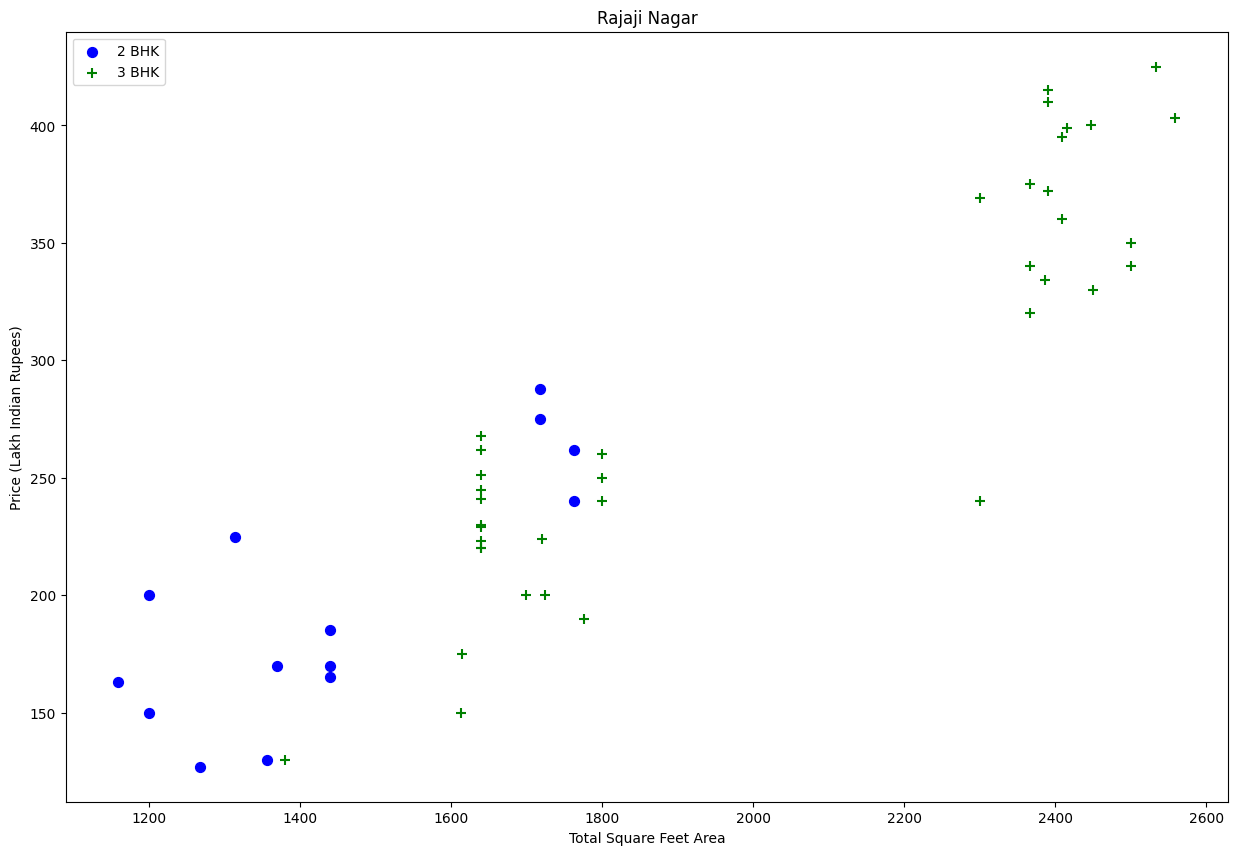

In [38]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price (Lakh Indian Rupees)")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df,"Rajaji Nagar")

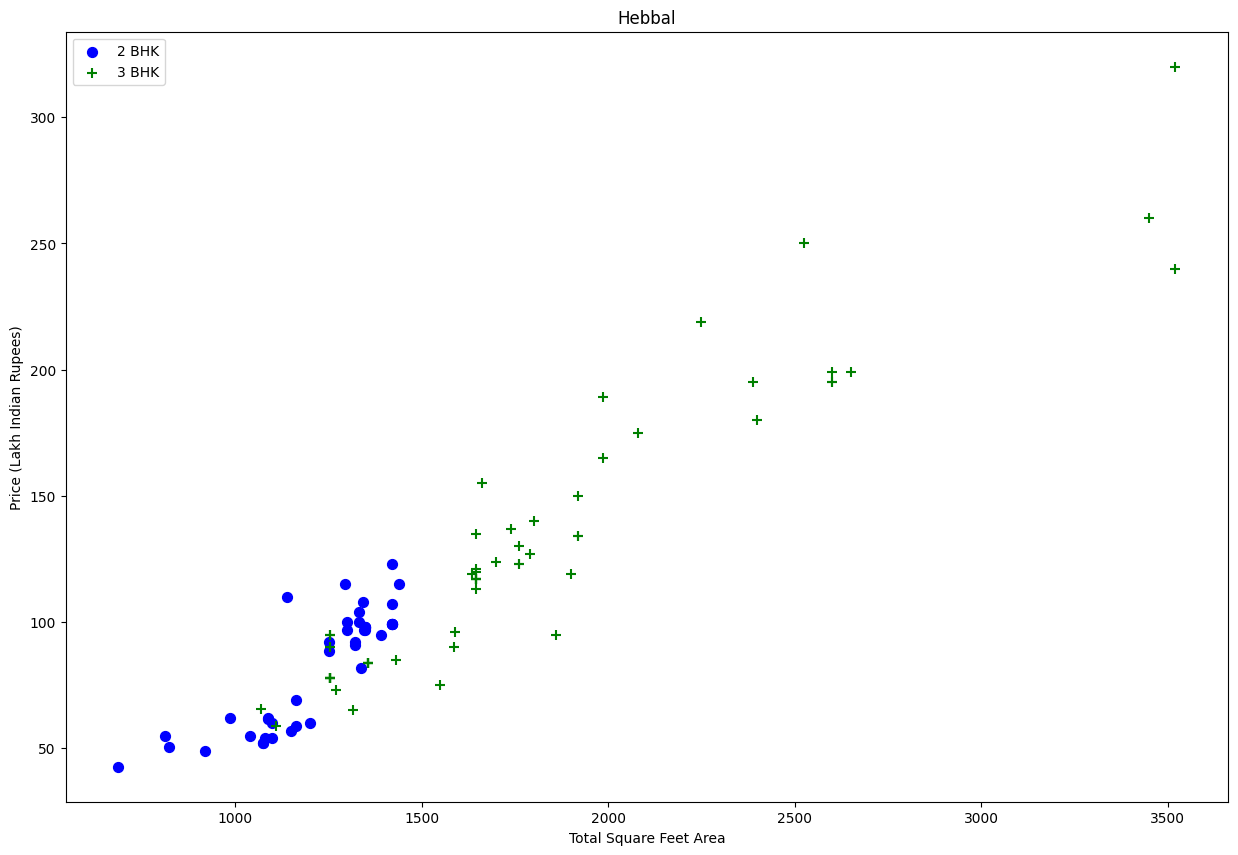

In [39]:
plot_scatter_chart(df,"Hebbal")

We can observe that in the above figure the 2 BHK datapoints are higher in price than the 3BHK which is somehow considered to be an outlier
So for that we will create a dictionary of stats per bhk

In [40]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

Using the above function we can remove those 2 BHK apartment whose price_per_sqft is less than the mean price_per_sqft of 1 BHK apartment

In [41]:
df = remove_bhk_outliers(df)
df.shape

(7317, 7)

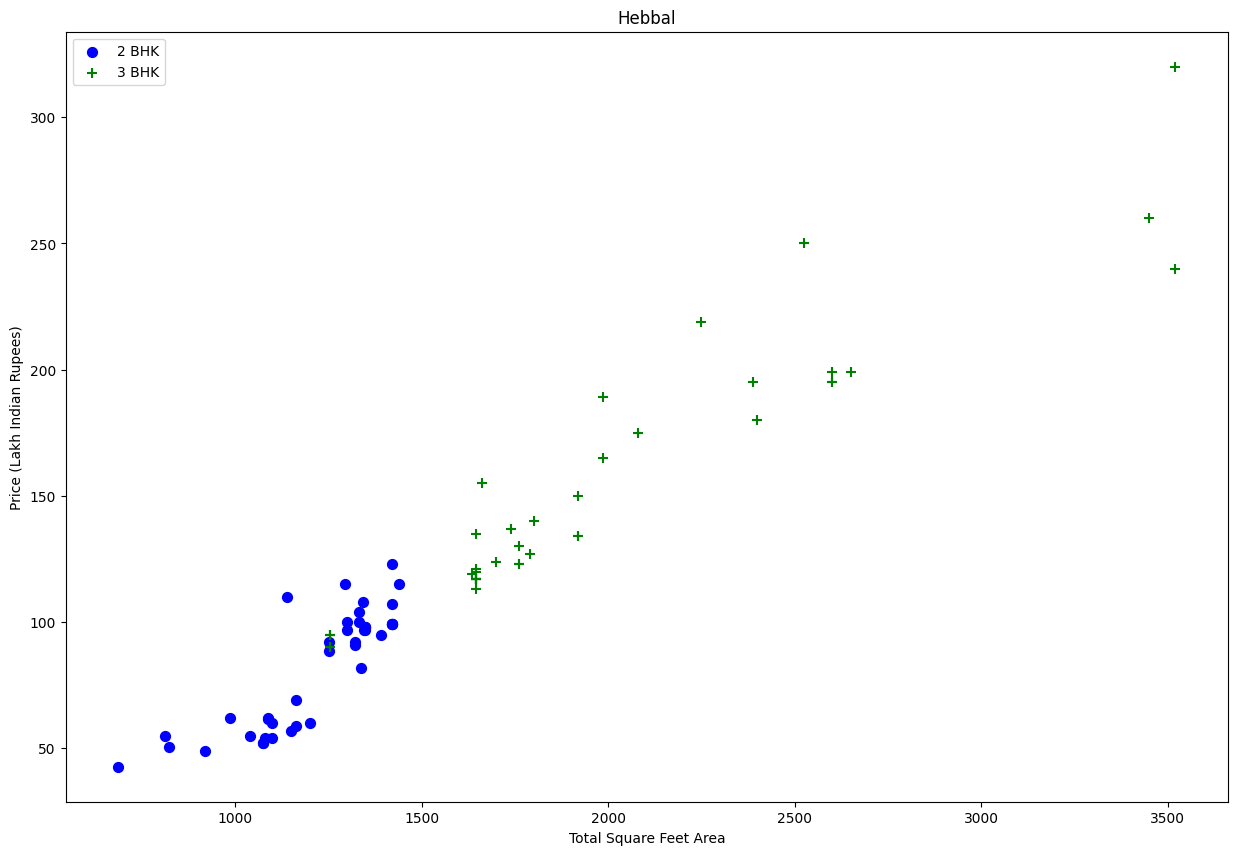

In [42]:
plot_scatter_chart(df,"Hebbal")

so we can observe the green data points over blue are now vanished which tells that 3 BHK apartment is not an outlier

Text(0, 0.5, 'Count')

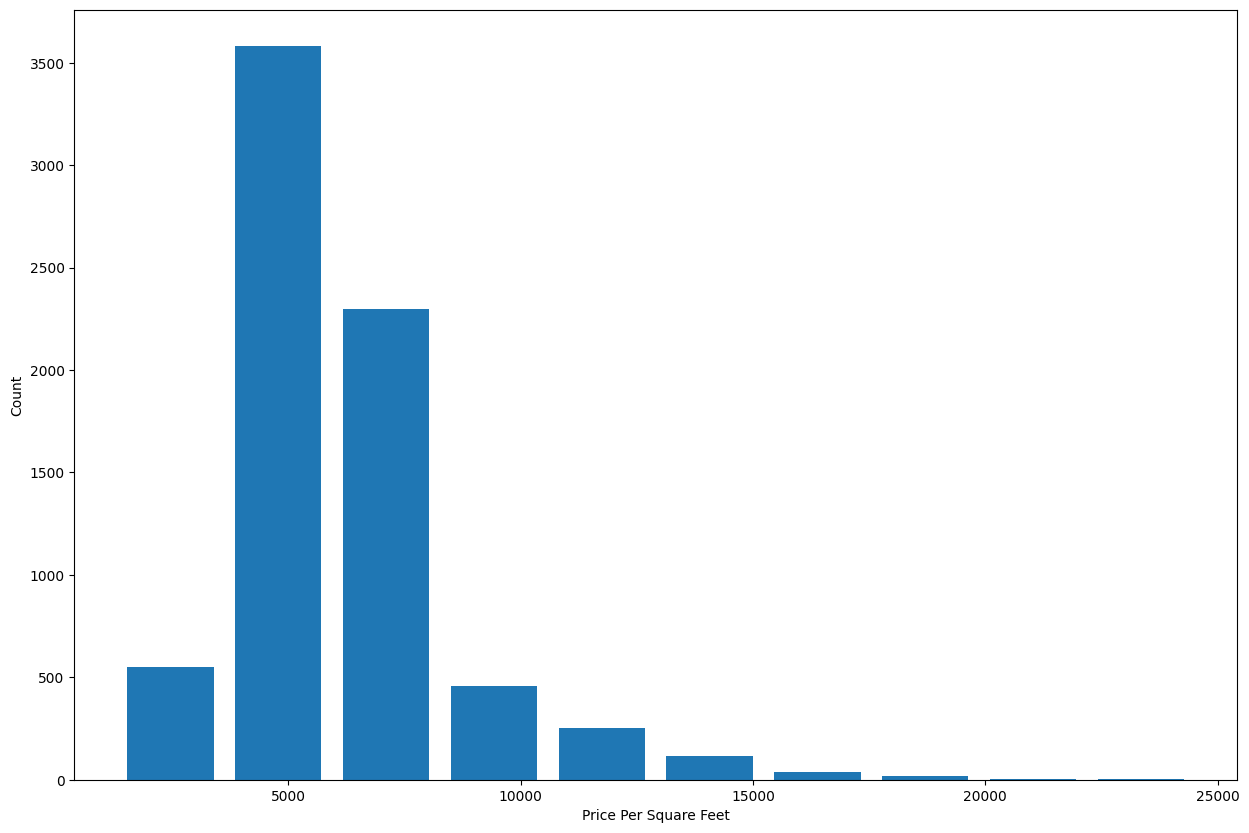

In [43]:
plt.hist(df.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

we can observe majority of our datapoints lies between 0 to 10000 price per square feet

In [44]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

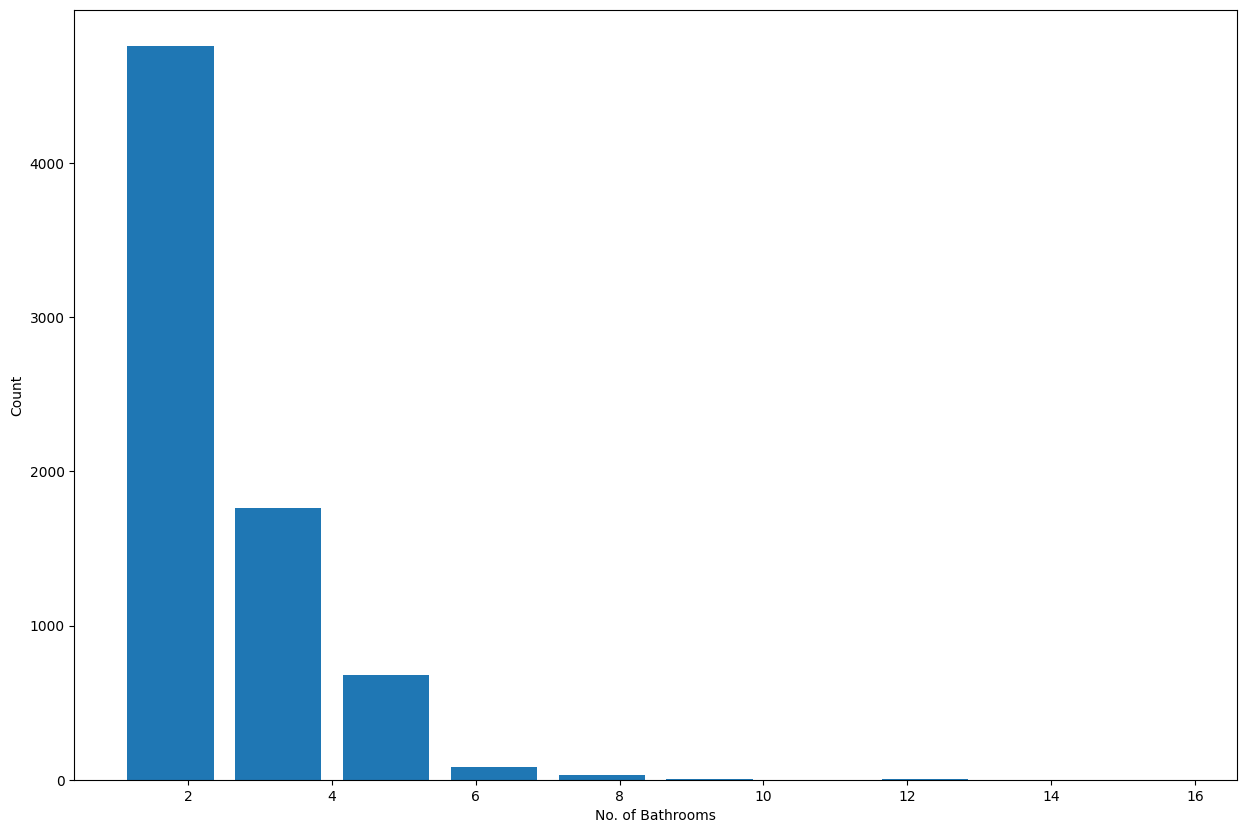

In [45]:
plt.hist(df.bath, rwidth=0.8)
plt.xlabel("No. of Bathrooms")
plt.ylabel("Count")

So we can saw there are some outliers present in the above graphs as maybe some houses consist of 12 bathrooms but that is rare so we discuss this issue with the real estate analyst
he gives us a estimate that each house do not contain bathrooms higher than the number of bedroom + 2 so on this theory we will remove the outliers

In [46]:
df[df.bath>df.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


so we have 4 outliers present in our dataset so we simply remove them

In [47]:
df = df[df.bath<df.bhk+2]
df.shape

(7239, 7)

In [48]:
df.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333


so now our dataset is more likely handled with the outliers and now we don't require the price_per_sqft as we use that for outlier detection
and size columns as we have BHK column for the model training

In [49]:
df = df.drop(['size','price_per_sqft'],axis=1)

In [50]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [51]:
dummies = pd.get_dummies(df.location,dtype=int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


so it is better to remove one location from the dataset for avoiding the dummies trap

In [53]:
df = df.drop('location',axis='columns')

In [54]:
df.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df.shape

(7239, 244)

In [56]:
x = df.drop('price',axis='columns')
x.shape

(7239, 243)

In [57]:
y = df.price
y.shape

(7239,)

Splitting the data

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)
x_train.shape,y_train.shape

((5791, 243), (5791,))

Feature Engineering

In [59]:
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

Model Training

Linear Regression

In [60]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(85.23137584485154, 86.29132245229447)

SVM

In [62]:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [63]:
svr.score(x_train,y_train)*100,svr.score(x_test,y_test)*100

(50.24010529314771, 66.99613938761006)

DecisionTreeRegressor

In [64]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(99.24641586257006, 70.07381189420178)

RandomForestRegressor

In [66]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [67]:
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

(96.53908694491642, 77.79226780830666)

Cross-Validation Score

In [68]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [69]:
cross_val_score(lr,x,y,cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [70]:
cross_val_score(svr,x,y,cv=cv)

array([0.41920682, 0.65933706, 0.59017333, 0.35501546, 0.63316904])

In [71]:
cross_val_score(dt,x,y,cv=cv)

array([0.82269165, 0.74974771, 0.59448782, 0.64670711, 0.76883241])

In [72]:
cross_val_score(rf,x,y,cv=cv)

array([0.83931818, 0.83802535, 0.78160063, 0.62963441, 0.83872714])

HyperParameter Tuning

Linear Regression

In [73]:
grid_params = {
                'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]
            }
lr_grid_search = GridSearchCV(estimator=lr, param_grid=grid_params, cv=10)

lr_grid_search.fit(x,y)


GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, 15, None],
                         'positive': [True, False]})

In [74]:
lr_grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}

In [75]:
lr_grid_search.best_score_*100

np.float64(67.53897250788118)

DecisionTreeRegressor

In [76]:
grid_params = {
    'criterion': ['mse','squared_error', 'friedman_mse'],
    'splitter': ['best','random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
            }
dt_grid_search = GridSearchCV(estimator=dt, param_grid=grid_params, cv=10)

dt_grid_search.fit(x,y)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'squared_error', 'friedman_mse'],
                         'max_depth': [10, 20, 30],
                         'min_samples_split': [5, 10],
                         'splitter': ['best', 'random']})

In [77]:
dt_grid_search.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_split': 5,
 'splitter': 'random'}

In [78]:
dt_grid_search.best_score_*100

np.float64(66.97315515435542)

In [79]:
df.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So we observe that Linear Regression Model Performs better than the other models

In [80]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]

    Y = np.zeros(len(x.columns))
    Y[0] = sqft
    Y[1] = bath
    Y[2] = bhk
    if loc_index >= 0:
        Y[loc_index] = 1

    return lr.predict([Y])[0]

In [81]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.86570258311667)

In [82]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(86.08062284986435)

In [83]:
predict_price('Indira Nagar',1000, 2, 2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(193.3119773317973)

In [84]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [85]:
from google.colab import files
files.download('banglore_home_prices_model.pickle')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [87]:
files.download('columns.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>